# **Group Assignment** - Bike Sharing

## Dataset Description

- `instant`: record index
- `Datetime` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : mnth ( 1 to 12)
- `hr` : hr (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `Count`: count of total rental bikes including both casual and registered

## Assignment Guidelines & Grading Criteria

*The administration of Washington D.C wants to make a deeper analysis of the usage of the bike-sharing service present in the city in order to build a predictor model that helps the public transport department anticipate better the provisioning of bikes in the city. For these purposes, some data is available for the years 2011 and 2012.*



**Main goals:**

As part of the team of the hired consultancy firm, your work is to build an interactive, insightful and complete report about the bike-sharing service in the city for the head of transportation services of the local government. As part of the requirements, there are two big points:

1. The customer wants a deep analysis of the bike-sharing service. He wants to know how the citizens are using the service in order to know if some changes must be made to optimize costs or provide a better service.
2. The customer also wants a predictive model able to predict the total number of bicycle users on an hourly basis. They believe this will help them in the optimization of bike provisioning and will optimize the costs incurred from the outsourcing transportation company.

**Grading criteria**

**Data Analysis (descriptive analytics) (3 points)**
- Ensuring data quality (correctness, consistency, missing values, outliers...).
- Plotting clear and meaningful figures.
- Giving insights on what seems relevant for prediction and what does not.
- Discussion on missing values and outliers
- Treatment of text and date features
- Generation of extra features (e.g., season, yes/no holiday, hours of daylight, combinations of features, quantization/binarization, polynomial features)
- Provide useful explanations about the decisions taken and the results obtained

**NOTES:**
There's no limit to the number of figures or insights to extract, but the quality will count more than the quantity. 


**Machine Learning (predictive analytics) (3 points)**
- Choosing the best model to solve the problem (linear and non-linear).
- Split data correctly to train and test your models
- Tuning model parameters with validation
- Obtaining accurate predictions in tests
- Plotting predictions vs. reality for additional insights
- Deep analysis of results and insights given the features
- Provide explanations about the decisions taken (chosen model, hyperparameter settings, evaluation metric employed, etc.)
**NOTES:**
Limit the libraries to those seen in class: sklearn, xgboost, lightgbm, catboost, pycaret, pandas, etc
This model will not be evaluated just by the score obtained


**Interactive report with Streamlit (4 points)**
- Requirement: Use Streamlit (https://streamlit.io/)
- Include all knowledge from the previous points in a unified tool that comprises all knowledge about data and satisfies the requirements of the customer.
- Try to use headers and subheaders to separate the different parts of your work
- Use separate sections to tell your story with cohesion. Missings, creation of new variables, exploratory data analysis, modeling, and recommendations about the actions to take by the results.
- Include Plotly graphs to show your insights but also to show the analysis of the results of your models.
- Include some kind of interactivity to your graphs by including text boxes, sliders, and any kind of input type element in Streamlit.

**NOTES:**
To include graphics, data, and the results of the model you can export all elements you need from the notebook (in CSV, json, or any other format) and then read it again in the dashboard script.


- These grading criteria contain just some points to take into account.
- The final grading will take into account more things like programming style, cleanliness, the correct use of pandas and other libraries (without redundant code), and the creativity of the group to provide an original solution that solves the business problem.
- Use your creativity and your already-acquired knowledge of engineering, machine learning, plotting, and programming to build a sophisticated tool for the local government department.

**Submission**


Jupyter Notebook with all code developed for this assignment. This includes all exploratory data analysis and machine learning models. Name: Group<groupname>_Notebook_Assignment2.ipynb
Python script that launches the streamlit dashboard. Name: Group<groupname>_StreamlitSrc_Assigment2.py
This script must be ready to be executed with the command streamlit run <yourscriptname> without errors.

## PART I: Exploratory Data Analysis

In [178]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px

In [179]:
data = pd.read_csv('bike-sharing_hourly.csv', index_col='instant')

In [180]:
data.rename(columns=
            {'dteday' : 'Date',
             'season' : 'Season',
             'yr' : 'Year',
             'mnth' : 'Month',
             'hr' : 'Hour',
             'holiday' : 'Is_Holiday',
             'weekday' : 'Weekday',
             'workingday' : 'Is_Working_Day',
             'weathersit' : 'Weather_Condition',
             'temp' : 'Temperature',
             'atemp' : 'Temperature_Feel',
             'hum' : 'Humidity',
             'windspeed' : 'Wind_Speed',
             'casual' : 'Casual_Users',
             'registered' : 'Registered_Users',
             'cnt' : 'Total_Users'
            }, inplace=True)

The original dataset provided the `Temperature`, Temperature Feel, Humidy and Wind Speed variables in normalized form. All values of each column were devided by their respective maximum. While this might benefit some model's understanding of the data, it critically hinders the model's predictability of values above that maximum, as values will no longer be contained between 0 and 1.

In order to facilitate generalization for future possible values, these variables were denormalized by multiplying all their values by the respective real maximums (as per indication of the original dataset).

In [181]:
# Denormalizing as to be repreducible with predictions that might fall outside normalization range

data['Temperature'] *= 41

data['Temperature_Feel'] *= 50

data['Humidity'] *= 100

data['Wind_Speed'] *= 67

Another step in engineering the variables of the original dataset was in retrieving all the available information from the date value. Separating 'Day' in a new column as well as indicating to which week of a year that date belonged seemed logic.

In order to facilitate understanding:
- 'Year' as replaced with 2011 and 2012 instead of 0 and 1
- In 'Hour' the 0 was replaced with 24
- In Weekday the 0 was replaced with 7 (making 1 Monday and 7 Sunday)
- IN Weather_Condition 4 was replaced with 3 due to the very low amount of records and similar impact on target variable (People won't bike as much if it is light rain or heavy rain)

In [182]:
data['Date'] = pd.to_datetime(data['Date'])

data['Day'] = data['Date'].apply(lambda x: x.day)

data['Week'] = pd.to_numeric(data['Date'].apply(lambda x: datetime.strftime(x, '%U')))

data['Year'].replace({0:2011,1:2012},inplace=True)

data['Weekday'].replace({0:7},inplace=True)

In [183]:
# There are only 4 instances of 4, we can group it with 3?
data['Weather_Condition'].replace(4,3,inplace=True)

New Features

In order to understand if the time of the day, in general is important, instead of each hour, this was created.

In [184]:
def day_period(hour):
    if 0 <= hour < 6:
        return 1 # Twilight
    elif 6 <= hour < 12:
        return 2 # Morning
    elif 12 <= hour < 18:
        return 3 # Afternoon
    elif 18 <= hour:
        return 4 # Night
    
data['Day_Period'] = data.apply(lambda x: day_period(x['Hour']), axis=1)

Due to the cyclical nature of 'Hour', 'Day', 'Weekday', 'Week', 'Month' a sin and cos transformation. This supports the model in seeing these time variables as cyclical (for example after the 24th hour, it comes the 1st and not the 25th)

In [185]:
data['Cos_Hour'] = data['Hour'].map(
    lambda x: np.cos(2*np.pi*x/24)
)

data['Sin_Hour'] = data['Hour'].map(
    lambda x: np.sin(2*np.pi*x/24)
)

data['Cos_Day'] = data['Day'].map(
    lambda x: np.cos(2*np.pi*x/30)
)

data['Sin_Day'] = data['Day'].map(
    lambda x: np.sin(2*np.pi*x/30)
)

data['Cos_Weekday'] = data['Weekday'].map(
    lambda x: np.cos(2*np.pi*x/7)
)

data['Sin_Weekday'] = data['Weekday'].map(
    lambda x: np.sin(2*np.pi*x/7)
)

data['Cos_Week'] = data['Week'].map(
    lambda x: np.cos(2*np.pi*x/52)
)

data['Sin_Week'] = data['Week'].map(
    lambda x: np.sin(2*np.pi*x/52)
)

data['Cos_Month'] = data['Month'].map(
    lambda x: np.cos(2*np.pi*x/12)
)

data['Sin_Month'] = data['Month'].map(
    lambda x: np.sin(2*np.pi*x/12)
)

In [186]:
data['Temperature/Feel_Factor'] = data['Temperature_Feel'] / abs(data['Temperature'])
data ['Weather_Factor'] = data['Temperature'] * data['Humidity'] * data['Wind_Speed'] * 1/data['Weather_Condition']

# Hourly
data['Average_Hourly_Users'] = data.groupby('Hour')['Total_Users'].transform('mean')
data['Min_Hourly_Users'] = data.groupby('Hour')['Total_Users'].transform('min')
data['Max_Hourly_Users'] = data.groupby('Hour')['Total_Users'].transform('max')

data['Average_Hourly_Temperature_Season'] = data.groupby(['Season','Hour'])['Temperature'].transform('mean')
data['Min_Hourly_Temperature_Season'] = data.groupby(['Season','Hour'])['Temperature'].transform('min')
data['Max_Hourly_Temperature_Season'] = data.groupby(['Season','Hour'])['Temperature'].transform('max')

data['Average_Hourly_Humidity_Season'] = data.groupby(['Season','Hour'])['Humidity'].transform('mean')
data['Min_Hourly_Humidity_Season'] = data.groupby(['Season','Hour'])['Humidity'].transform('min')
data['Max_Hourly_Humidity_Season'] = data.groupby(['Season','Hour'])['Humidity'].transform('max')

data['Average_Hourly_Wind_Speed_Season'] = data.groupby(['Season','Hour'])['Wind_Speed'].transform('mean')
data['Min_Hourly_Wind_Speed_Season'] = data.groupby(['Season','Hour'])['Wind_Speed'].transform('min')
data['Max_Hourly_Wind_Speed_Season'] = data.groupby(['Season','Hour'])['Wind_Speed'].transform('max')

#Daily
data['Average_Daily_Users'] = data.groupby(['Season','Weekday'])['Total_Users'].transform('mean')
data['Min_Daily_Users'] = data.groupby(['Season','Weekday'])['Total_Users'].transform('min')
data['Max_Daily_Users'] = data.groupby(['Season','Weekday'])['Total_Users'].transform('max')

data['Average_Daily_Users_Season'] = data.groupby(['Season','Weekday'])['Temperature'].transform('mean')
data['Min_Daily_Users_Season'] = data.groupby(['Season','Weekday'])['Temperature'].transform('min')
data['Max_Daily_Users_Season'] = data.groupby(['Season','Weekday'])['Temperature'].transform('max')

data['Average_Daily_Humidity_Season'] = data.groupby(['Season','Weekday'])['Humidity'].transform('mean')
data['Min_Daily_Humidity_Season'] = data.groupby(['Season','Weekday'])['Humidity'].transform('min')
data['Max_Daily_Humidity_Season'] = data.groupby(['Season','Weekday'])['Humidity'].transform('max')

data['Average_Daily_Wind_Speed_Season'] = data.groupby(['Season','Weekday'])['Wind_Speed'].transform('mean')
data['Min_Daily_Wind_Speed_Season'] = data.groupby(['Season','Weekday'])['Wind_Speed'].transform('min')
data['Max_Daily_Wind_Speed_Season'] = data.groupby(['Season','Weekday'])['Wind_Speed'].transform('max')

During Trial Period, lagged variables were created and tested, but given the focus on regressive and not timeseries predicitions, these variables don't make sense as they won't exist for all predictions that are not immediatly after the last record of the available dataset

## PART II: Prediction Model

## Model Building

In [187]:
target = ['Total_Users']

cat_cols = [
    'Season',
    'Year',
    'Day_Period',
    'Is_Holiday',
    'Is_Working_Day',
    'Weather_Condition'
]

ordinal_cols = {'Weather_Condition' : ['1','2','3']}

date_cols = ['Date']

ignore_cols = [
    'Hour',
    'Day',
    'Month',
    'Weekday',
    'Week',
    'Temperature_Feel',
    'Registered_Users',
    'Casual_Users'
]

other_cols = cat_cols + date_cols + ignore_cols + target

num_cols = [x for x in data.columns if x not in other_cols]

In [188]:
data_unseen = data.loc[data['Date']>='2012-09-01']
data = data.loc[data['Date']<'2012-09-01']

hour_col_unseen = data_unseen['Hour']

data.drop(columns=ignore_cols,inplace=True)

In [189]:
X_train = data[[*cat_cols,*num_cols]]
y_train = data['Total_Users']

X_test = data_unseen[[*cat_cols,*num_cols]]
y_test = data_unseen['Total_Users']

In [190]:
from pycaret.regression import *

In [191]:
model = setup(
    
    # Basic options
    data = data,
    target = target[0],
    train_size = 0.8,
    categorical_features = cat_cols,
    numeric_features = num_cols,
    # date_features = date_cols,
    # ordinal_features = ordinal_cols,
    preprocess = False,
    # custom_pipeline = transformer,
    fold_strategy = 'kfold',
    fold = 10,
    data_split_shuffle = True,
    
    feature_selection = True,
    feature_selection_threshold = 0.1,
    feature_selection_method = 'classic',
    
    # Paralellization options
    n_jobs = -1,
    use_gpu = True,
    
    session_id = 123 # Controls randomness
)

,Description,Value
0,session_id,123
1,Target,Total_Users
2,Original Data,"(14491, 47)"
3,Missing Values,False
4,Numeric Features,39
5,Categorical Features,6
6,Transformed Train Set,"(11592, 46)"
7,Transformed Test Set,"(2899, 46)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,False


In [193]:
model = compare_models(['catboost'],
    sort='RMSE',
    fold=10,
    n_select = 1
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,21.2616,1175.4453,34.1882,0.9601,0.3892,0.3699,6.8120


In [99]:
tuned_model = tune_model(
    model,
    optimize = 'RMSE', 
    fold = 10,
    search_algorithm = 'random',
    n_iter = 10
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20.0765,945.6908,30.7521,0.9674,0.3537,0.3332
1,20.7992,1068.0251,32.6807,0.9663,0.3612,0.3550
2,22.0438,1322.0253,36.3597,0.9565,0.3727,0.3569
3,19.7283,865.5723,29.4206,0.9708,0.3518,0.3108
4,20.9476,1161.6718,34.0833,0.9600,0.3663,0.3606
5,21.7709,1448.5355,38.0596,0.9510,0.3521,0.3186
6,22.8398,1446.9652,38.0390,0.9548,0.3537,0.3497
7,20.6562,1182.0826,34.3814,0.9588,0.3632,0.3370
8,21.7310,1252.0316,35.3841,0.9552,0.3623,0.3473


In [233]:
prediction = predict_model(tuned_model, data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,64.6361,8276.5367,90.9755,0.8253,0.7875,1.3704


In [234]:
prediction.rename(columns={'Label': 'Prediction','Total_Users':'Actual'},inplace=True)

In [235]:
prediction.to_csv('prediction.csv')

In [237]:
prediction[['Actual','Prediction']].head()

,Actual,Prediction
instant,,
14492,168,103.321566
14493,79,93.356923
14494,69,81.104180
14495,35,38.004118
14496,12,19.562454


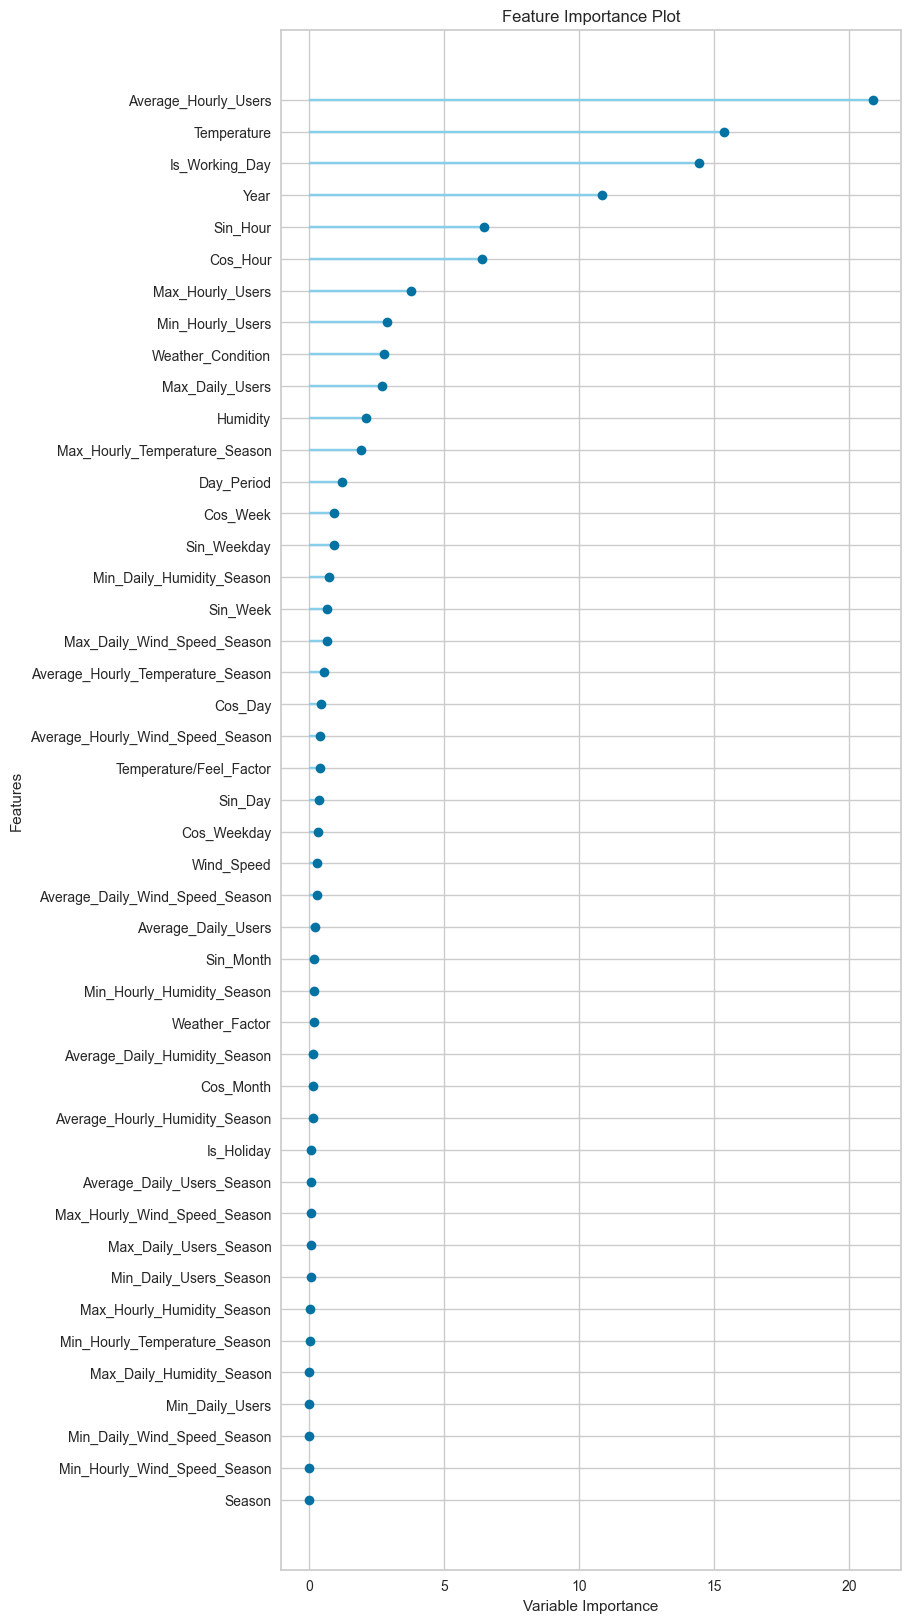

In [102]:
plot_model(tuned_top1, plot = 'feature_all')

In [103]:
tuned_model.get_params()

{'depth': 11,
 'l2_leaf_reg': 2,
 'loss_function': 'RMSE',
 'border_count': 254,
 'verbose': False,
 'random_strength': 0.6,
 'task_type': 'CPU',
 'n_estimators': 260,
 'random_state': 123,
 'eta': 0.05}

Below just for streamlit

In [59]:
from catboost import CatBoostRegressor

In [39]:
def Model(X_train, y_train, X_test, y_test):
    
    CBR = CatBoostRegressor(
    depth = 8,
    l2_leaf_reg = 30,
    loss_function = RMSE,
    border_count = 254,
    verbose = False
    random_strength = 0.2,
    task_type = 'CPU',
    n_estimators = 180,
    random_state = 123,
    eta = 0.4
    )

    CBR.fit(X_train,y_train)
    
    y_train_Pred = CBR.predict(X_train)

    y_test_Pred = CBR.predict(X_test)

    # Create list of dictionaries with scoring metrics
    
    metrics_rf = [
         {'set': 'Train', 'metric': 'R2 score', 'value': r2_score(y_train, y_train_Pred)},    
         {'set': 'Train', 'metric': 'MSE', 'value': mean_squared_error(y_train, y_train_Pred)},    
         {'set': 'Train', 'metric': 'MAE', 'value': mean_absolute_error(y_train, y_train_Pred)},    
         {'set': 'Test', 'metric': 'R2 score', 'value': r2_score(y_test, y_test_Pred)},    
         {'set': 'Test', 'metric': 'MSE', 'value': mean_squared_error(y_test, y_test_Pred)},    
         {'set': 'Test', 'metric': 'MAE', 'value': mean_absolute_error(y_test, y_test_Pred)}]

    # Create the DataFrame
    metrics_rf = pd.DataFrame(metrics_rf)
    
    # Pivot the DataFrame
    metrics_rf = metrics_rf.pivot(index='metric', columns='set', values='value')
    metrics_rf = metrics_rf.reindex(columns=['Train', 'Test'])


    return metrics_rf, y_test_Pred

In [ ]:
metrics_rf, prediction_from_input = RF_Model(X_train, y_train, input_x_test, [0])